In [196]:
import tensorflow as tf
from keras import models, layers
from keras.datasets import mnist
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

In [197]:
train_images.shape

(60000, 28, 28)

In [198]:
len(train_labels)

60000

In [199]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [200]:
test_images.shape

(10000, 28, 28)

In [201]:
len(test_labels)

10000

In [202]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [203]:
import matplotlib.pyplot as plt

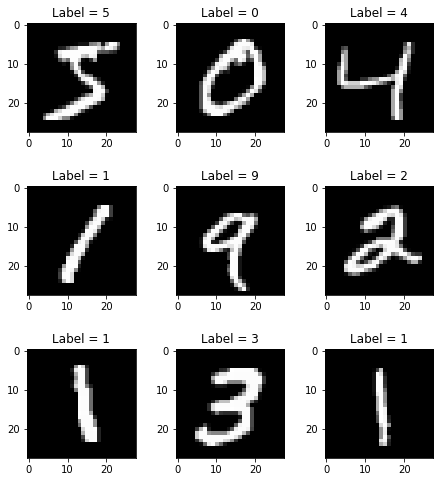

In [204]:
fig, axs = plt.subplots(3, 3, figsize=(8, 8))
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()
for i in range(9):
    axs[i].imshow(train_images[i], cmap='gray')
    axs[i].set_title("Label = %d" % train_labels[i])
plt.show()

Model1

In [205]:
model1=models.Sequential()
model1.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
model1.add(layers.Dense(10,activation='softmax'))

In [206]:
model1.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [207]:
train_images1 = train_images.copy()
train_labels1 = train_labels.copy()
test_images1 = test_images.copy()

train_images1=train_images1.reshape((60000,28*28))
train_images1=train_images1.astype('float32')/255

test_images1=test_images1.reshape((10000,28*28))
test_images1=test_images1.astype('float32')/255

In [208]:
from tensorflow.keras.utils import to_categorical
train_labels1 = to_categorical(train_labels1)
test_labels1 = to_categorical(test_labels)

In [209]:
model1.fit(train_images1,train_labels1,epochs=20,batch_size=128)

Epoch 1/20
469/469 [==============================] - 2s 5ms/step - loss: 0.2586 - accuracy: 0.9255
Epoch 2/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1033 - accuracy: 0.9693
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0675 - accuracy: 0.9794
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0498 - accuracy: 0.9854
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0374 - accuracy: 0.9889
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0283 - accuracy: 0.9914
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0218 - accuracy: 0.9931
Epoch 8/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0169 - accuracy: 0.9946
Epoch 9/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0128 - accuracy: 0.9964
Epoch 10/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0097 - accuracy: 0.9973

In [210]:
test_loss, test_acc = model1.evaluate(test_images1,test_labels1)
print("test accuracy:",test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.0942 - accuracy: 0.9831
test accuracy: 0.9830999970436096


Model2

In [211]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))


In [212]:
model2.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])

In [213]:
train_images2 = train_images.copy()
train_labels2 = train_labels.copy()
test_images2 = test_images.copy()

train_images2 = train_images2.reshape(train_images2.shape[0], 28, 28, 1)
train_images2 = train_images2.astype('float32') / 255
test_images2 = test_images2.reshape(test_images2.shape[0], 28, 28, 1)
test_images2 = test_images2.astype('float32') / 255
train_labels2 = train_labels2.astype('float32')

In [214]:
train_images2 = train_images2.reshape(train_images2.shape[0], 28, 28, 1)

model2.fit(train_images2,train_labels2,epochs=20,batch_size=128)

Epoch 1/20
469/469 [==============================] - 6s 13ms/step - loss: 1.7030 - accuracy: 0.7628
Epoch 2/20
469/469 [==============================] - 6s 12ms/step - loss: 1.4898 - accuracy: 0.9729
Epoch 3/20
469/469 [==============================] - 5s 12ms/step - loss: 1.4818 - accuracy: 0.9802
Epoch 4/20
469/469 [==============================] - 6s 13ms/step - loss: 1.4768 - accuracy: 0.9850 1s - ETA: 0s - loss: 1 - ETA: 0s - loss: 1.4768 - accura
Epoch 5/20
469/469 [==============================] - 6s 13ms/step - loss: 1.4746 - accuracy: 0.9869
Epoch 6/20
469/469 [==============================] - 6s 13ms/step - loss: 1.4733 - accuracy: 0.9883 
Epoch 7/20
469/469 [==============================] - 6s 13ms/step - loss: 1.4719 - accuracy: 0.9897
Epoch 8/20
469/469 [==============================] - 6s 12ms/step - loss: 1.4716 - accuracy: 0.9898
Epoch 9/20
469/469 [==============================] - 6s 12ms/step - loss: 1.4709 - accuracy: 0.9905
Epoch 10/20
469/469 [============

In [215]:
test_loss2, test_acc2 = model2.evaluate(test_images2,test_labels)
print("test accuracy:",test_acc2)

313/313 [==============================] - 2s 5ms/step - loss: 1.4709 - accuracy: 0.9901
test accuracy: 0.9901000261306763


In [223]:
from tensorflow.keras.layers import Input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model

In [224]:
input_tensor = Input(shape=(28, 28, 1))

In [225]:
base_model = ResNet50(include_top=False, weights=None, input_tensor=input_tensor)
x = base_model.output
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
predictions = tf.keras.layers.Dense(10, activation='softmax')(x)
model3 = Model(inputs=base_model.input, outputs=predictions)

In [226]:
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [227]:
train_images3 = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images3 = test_images.reshape(test_images.shape[0], 28, 28, 1)
train_images3 = train_images3.astype('float32') / 255
test_images3 = test_images3.astype('float32') / 255

train_labels3 = to_categorical(train_labels)
test_labels3 = to_categorical(test_labels)

In [228]:
model3.fit(train_images3, train_labels3, epochs=20, batch_size=128, validation_data=(test_images3, test_labels3))

Epoch 1/20
469/469 [==============================] - 94s 201ms/step - loss: 0.2882 - accuracy: 0.9143 - val_loss: 1.8555 - val_accuracy: 0.4700
Epoch 2/20
469/469 [==============================] - 94s 200ms/step - loss: 0.0715 - accuracy: 0.9793 - val_loss: 0.1114 - val_accuracy: 0.9688
Epoch 3/20
469/469 [==============================] - 94s 201ms/step - loss: 0.0502 - accuracy: 0.9855 - val_loss: 0.0800 - val_accuracy: 0.9785
Epoch 4/20
469/469 [==============================] - 95s 202ms/step - loss: 0.0413 - accuracy: 0.9880 - val_loss: 0.0678 - val_accuracy: 0.9817
Epoch 5/20
469/469 [==============================] - 95s 202ms/step - loss: 0.0330 - accuracy: 0.9903 - val_loss: 0.1121 - val_accuracy: 0.9710
Epoch 6/20
469/469 [==============================] - 95s 202ms/step - loss: 0.0324 - accuracy: 0.9903 - val_loss: 0.0656 - val_accuracy: 0.9820
Epoch 7/20
469/469 [==============================] - 95s 202ms/step - loss: 0.0333 - accuracy: 0.9902 - val_loss: 0.0453 - val_ac

In [229]:
test_loss3, test_acc3 = model2.evaluate(test_images3,test_labels)
print("test accuracy:",test_acc3)

313/313 [==============================] - 1s 4ms/step - loss: 1.4709 - accuracy: 0.9901
test accuracy: 0.9901000261306763
